# Descriptive Analytics - Best Practices

In this article it is assumed that the content of the notebook 
https://nbviewer.org/github/juhanurmonen/data-analytics-basics-prepare-data/blob/main/Python_pandas_introduction.ipynb is familiar to the reader.

In this note, the following functions are used for calculation.

- __crosstab__ calculation of the frequency table
- __cut__ classification of a quantitative variable
- __count__ calculation of the number of occurencies
- __sum__ calculation of the sum of values
- __mean__ calculation of the average of values
- __describe__ calculation of statistical key figures

This notebook uses the following functions to create graphs.

- __plot.bar__ vertical bar chart
- __barplot__ bar chart from the seaborn library, which by default shows the averages, but other functions can also be used instead of the average (for example, sum)
- __countplot__ seaborn library bar chart showing numbers
- __histplot__ seaborn library histogram showing a classified distribution
- __boxplot__ chart of the seaborn library summarizing statistical key figures
- __subplots__ creating a chart consisting of multiple charts

The notebook uses formatted character strings (f-string). The f-string starts with the letter f followed by a string. Within a string, values of Python variables and formulas can be used inside curly brackets; for example $$\textrm{f'Reduced price {0.90*price}'}.$$ If you refer to the data variable inside the f-string, then quotation marks are used around the variable instead of apostrophes, for example $$\textrm{f'count (n = {df["age"].count()})'}.$$

## Preparations

In [1]:
### Import the pandas library

import pandas as pd

# Preparations for graphics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preparations for formatting the percentage axis of charts
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

# Dictionary for formatting tables
# Zero decimal places for the f-column, one decimal for the %-column
format = {'f':'{:.0f}', '%':'{:.1f} %'}

C:\Users\nurju\AppData\Local\Temp\ipykernel_12028\3111280546.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
### Read the data

df = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### Textual values of variables as lists

gender = ['man', 'woman']
education = ['comprehensive\n school', 'secondary\n school', 'university degree', 'master degree']
satisfaction = ['very unsatisfied', 'unsatisfied', 'no opinion', 
                'satisfied', 'very satisfied']

## Frequency table for a categorical variable

In [3]:
df1 = pd.crosstab(df['education'], 'f')

df1.columns.name = ''
df1.index = education
df1['%'] = df1['f']/df1['f'].sum()*100

# Displaying formatted table
df1.style.format(format)

,f,%
comprehensive school,27,33.3 %
secondary school,30,37.0 %
university degree,22,27.2 %
master degree,2,2.5 %


## Graphical representation of frequencies

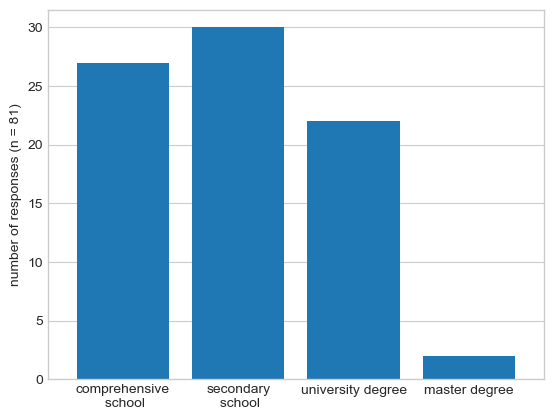

In [4]:
### Vertical bar chart of frequencies in the frequency table
df1['f'].plot.bar(width=0.8, rot=0)

### Title for the axis y
plt.ylabel(f'number of responses (n = {df1["f"].sum()})')

### Repeal the vertical gridline included in the seaborn-whitegrid style

plt.grid(axis='x')

## Graphical representation of percentages of frequencies

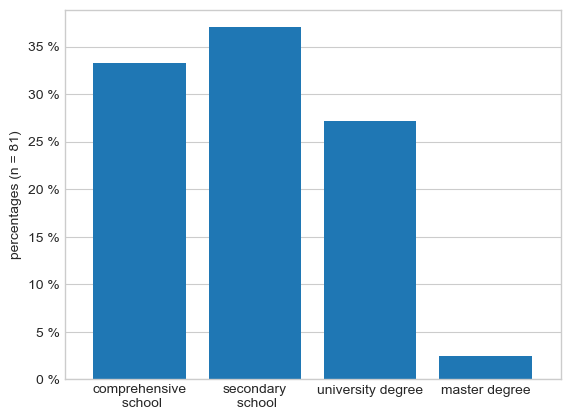

In [5]:
### Chart of percentages in the frequency table

df1['%'].plot.bar(width=0.8, rot=0)

### Formats in the axis y
plt.ylabel(f'percentages (n = {df1["f"].sum()})')

### Formatting the axis y numbers as percentages
### gca () (get current axis) refers to the graph generated

plt.gca().yaxis.set_major_formatter(ticks)

### Repeal the vertical gridline included in the seaborn-whitegrid style

plt.grid(axis='x')

## Frequencies for dichotomic (dummy) variables

The data variables occu_health, timeshare, gym and massage are dichotomous (have you used that benefit?). Value one means the benefit has been used and the sum of the ones gives the number of users.

In [6]:
## By the way, notice that

df.shape[0]

82

In [7]:
dichotomy = ['occu_health', 'timeshare', 'gym', 'massage']

### We add sums to the dataframe and then arrange by the sum

df2 = df[dichotomy].sum().to_frame('f').sort_values('f', ascending=False)

### Percentages are calculated from the number of respondents (number of rows of data)

df2['%'] = df2['f']/df.shape[0]*100

### Finally some housekeeping

df2.style.format(format)

,f,%
occu_health,47,57.3 %
massage,22,26.8 %
timeshare,20,24.4 %
gym,9,11.0 %


Text(0, 0.5, 'Number of users')

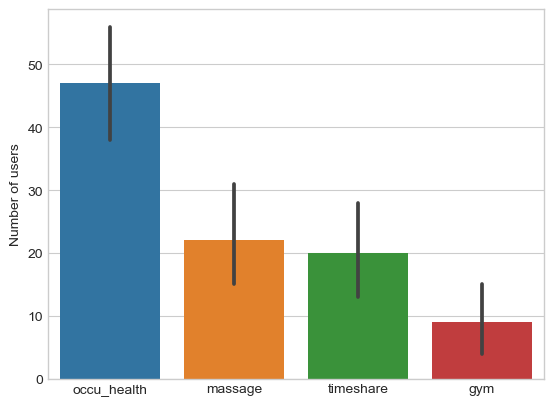

In [8]:
### Empty values have sometimes caused problems. So, we define.

df0 = df.fillna(0)

### Create a list of variables in order of frequency

list = df0[dichotomy].sum().sort_values(ascending=False).index

### Seaborn charts are made directly from the original data, so the table of the previous cell is not needed

sns.barplot(data=df0[list], estimator=sum)

### The axis y label

plt.ylabel('Number of users')

## Missing values

The variable colleagues (satisfaction with co-workers) was measured on a 5-point scale (1=very unsatisfied, 5=very satisfied). One person didn't answer to this question. No missing values are allowed for an integer type variable (int), so this variable is floating-point type (float) unlike other satisfaction variables. This usually does not cause any problems from the point of view of analysis and in no way needs to be taken into account separately.

The problem that requires attention is that no one was extremely unsatisfied with their co-workers meaning answer option one has not been chosen by anyone. It is also missing from the frequency table. However, it would be good to show that option in the frequency table.

This can be done by changing the type of the variable to __category__.

In [9]:
### The value 1.0 (very unsatisfied) is not shown here because no one chose it.

df3 = pd.crosstab(df['colleagues'], 'f')

### Housekeeping and percentages

df3.columns.name = ''
df3['%'] = df3['f']/df3['f'].sum()*100

### Style formatting

df3.style.format(format)

,f,%
colleagues,,
2.000000,3,3.7 %
3.000000,16,19.8 %
4.000000,35,43.2 %
5.000000,27,33.3 %


In [10]:
### Let's make a new variable whose type is category.

df['colleagues_cat'] = pd.Categorical(df['colleagues'], categories=[1, 2, 3, 4, 5], ordered=True)

In [11]:
### Beacause of the dropna parameter, 'very unsatisfied' is also included in the frequency table.

df4 = pd.crosstab(df['colleagues_cat'], 'f', dropna=False)

### Housekeeping and column for percentages

df4.columns.name = ''
df4.index = satisfaction
df4['%'] = df4['f']/df4['f'].sum()*100

### Formatting and displaying

df4.style.format(format)

,f,%
very unsatisfied,0,0.0 %
unsatisfied,3,3.7 %
no opinion,16,19.8 %
satisfied,35,43.2 %
very satisfied,27,33.3 %


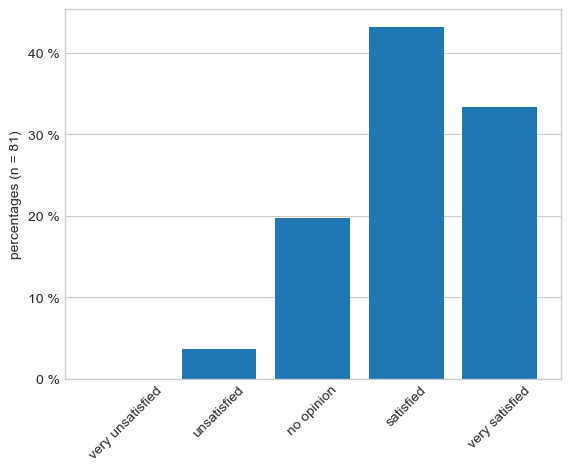

In [12]:
### Chart of percentages in the frequency table

df4['%'].plot.bar(width=0.8, rot=45)

### Housekeeping and formatting as above

plt.ylabel(f'percentages (n = {df4["f"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)
plt.grid(axis='x')

## Chart consisting of several charts

Using the __for__ loop, the distributions of several variables can be represented in a single figure that contains several charts.

The command $$\textrm{fig, axs = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 3))}$$ creates a figure with five charts next to each other (ncols=5) and the charts share a common y-axis (sharey=True). The command returns both the figure (fig) and the list of charts it contains (axs).

The __Enumerate__ function returns both the sequence numbers of the variables in the satisfactions list and the names of the variables. Sequence numbers are needed to indicate in which chart each variable is placed (_ax=axs[i]_).

More information about color maps can be found at https://matplotlib.org/stable/tutorials/colors/colormaps.html (parameter palette).

Text(0, 0.5, 'number of respondents')

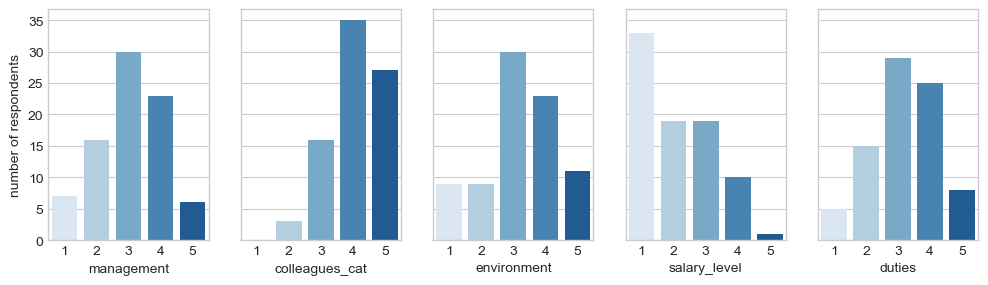

In [13]:
satisfactions = ['management', 'colleagues_cat', 'environment', 'salary_level', 'duties']

### Create the figure with five charts.
fig, axs = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 3))

### The for loop for charts

for i, var in enumerate(satisfactions):
    sns.countplot(x = var, data = df, ax = axs[i], palette = 'Blues')
    axs[i].set_ylabel('')
    
### Title for the axis y of the first chart

axs[0].set_ylabel('number of respondents')

## Classified distribution

A quantitative variable can be classified using the __cut__ function in the pandas library. By default, classes do not contain the lower limit of the class, but contain an upper limit.

The __histplot__ function produces a classification where the classes contain a lower limit but not an upper limit.

If one wants the classes generated by the cut function to be consistent with the histogram, the parameter _right=false_ can be used in connection with the cut function. Even after that, there may be a difference at the upper limit of the last class, which is included in the class in the histogram.

In [14]:
age_groups = [19, 29, 39, 49, 59, 69]

### Create the age groups

df['age_group'] = pd.cut(df['age'], bins = age_groups, right = False)

### Create the cross tabulation

df5 = pd.crosstab(df['age_group'], 'f')

### Housekeeping and percentages

df5.columns.name = ''
df5['%'] = df5['f']/df5['f'].sum()*100

### Formatting

df5.style.format(format)

,f,%
age_group,,
"[19, 29)",14,17.1 %
"[29, 39)",30,36.6 %
"[39, 49)",25,30.5 %
"[49, 59)",11,13.4 %
"[59, 69)",2,2.4 %


Next, draw a histogram to illustrate the classified distribution.

([<matplotlib.axis.XTick at 0x1c54fd81760>,
 [Text(19, 0, '19'),
  Text(29, 0, '29'),
  Text(39, 0, '39'),
  Text(49, 0, '49'),
  Text(59, 0, '59'),
  Text(69, 0, '69')])

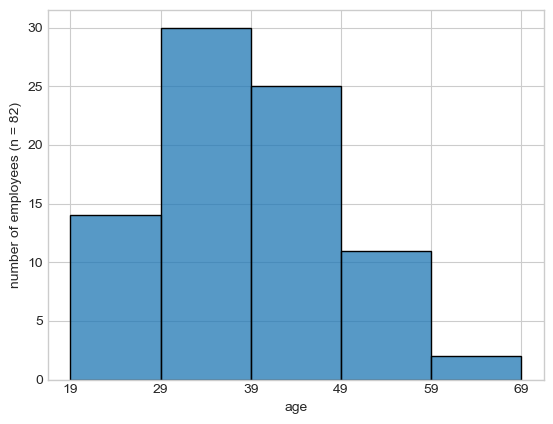

In [15]:
### Histogram for illustrating classified distribution.

sns.histplot(df['age'], bins = age_groups)

### Add n values to the axis y

plt.ylabel(f'number of employees (n = {df["age"].count()})')

### Add class limits to the horisontal axis
plt.xticks(age_groups)

Next we add percentages to the histplot chart.

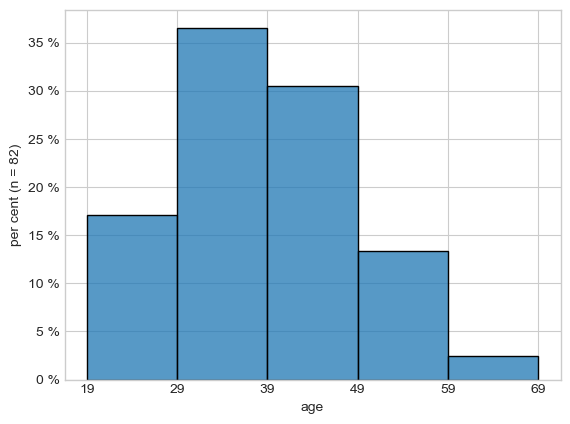

In [16]:
### Add percentages to histplot chart

sns.histplot(df['age'], stat = 'percent', bins = age_groups)

### Tune the labels

plt.xlabel('age')
plt.ylabel(f'per cent (n = {df["age"].count()})')

plt.xticks(age_groups)
plt.gca().yaxis.set_major_formatter(ticks)

## Statistical key figures

Statistical key figures can be calculated using the __describe__ function.

Seaborn's __Boxplot__ is a good way to illustrate key figures (smallest, lower quartile, median, upper quartile, largest).

Seaborn's __barplot__ is convenient for illustrating the average values of several variables, which by default presents the mean values as bars and also shows the error margins.

In [17]:
### Key figures for salary

df['salary'].describe()

count      82.000000
mean     2563.878049
std       849.350302
min      1521.000000
25%      2027.000000
50%      2320.000000
75%      2808.000000
max      6278.000000
Name: salary, dtype: float64

<Axes: xlabel='salary'>

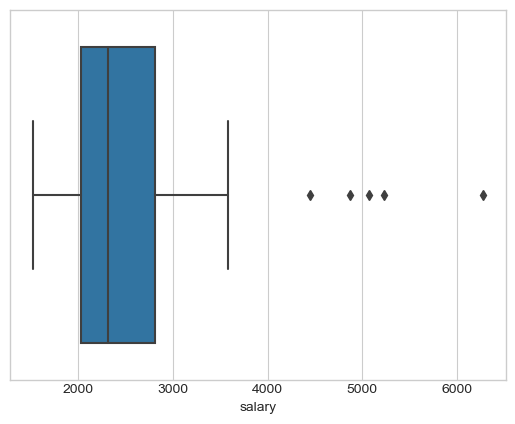

In [18]:
### Boxplot for salary

sns.boxplot(x='salary', data=df)

In [19]:
# Key figures for satisfactions
df.loc[:, 'management':'duties'].describe()

,management,colleagues,environment,salary_level,duties
count,82.000000,81.000000,82.000000,82.000000,82.000000
mean,3.060976,4.061728,3.219512,2.109756,3.195122
std,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,1.000000,3.000000
50%,3.000000,4.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 0, 'satisfaction mean (5 = very satisfied)')

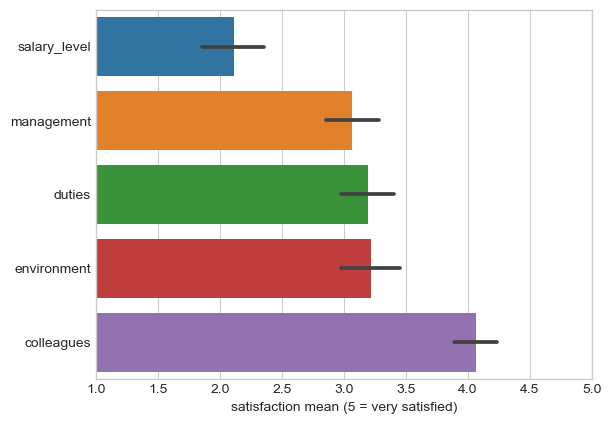

In [20]:
# List of satisfaction variables in order of mean
list1 = df.loc[:,'management':'duties'].mean().sort_values().index

# Bars and error margins describing mean values
sns.barplot(data=df[list1], orient='h')

# x-axis scaling (minimum value 1, maximum value 5)
plt.xlim(1, 5)

plt.xlabel('satisfaction mean (5 = very satisfied)')

Let's open yet another data with mental images measured on a scale of 0 to 10.

In [21]:
hatco = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/hatco.xlsx')
hatco

,id,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level,Firm size,Usage level %,Industry type,Buying situation
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2,0,32,1,1
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3,1,43,0,1
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2,1,48,1,2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9,1,32,1,1
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8,0,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4,1,25,1,1
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2,0,60,1,3
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7,1,38,0,1
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3,1,42,0,1


In [22]:
### Let's read the mental image variables into their own dataframe.

hatco1 = hatco.loc[:, 'Delivery Speed':'Satisfaction Level']

In [23]:
### Calculate statistical key figures for these image variables.

hatco1.describe()

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.515000,2.364000,7.894000,5.248000,2.916000,2.665000,6.971000,4.771000
std,1.320726,1.195659,1.386502,1.131414,0.751258,0.770855,1.585241,0.855558
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,3.200000
25%,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,4.100000
50%,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,4.850000
75%,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,5.400000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,6.800000


(0.0, 10.0)

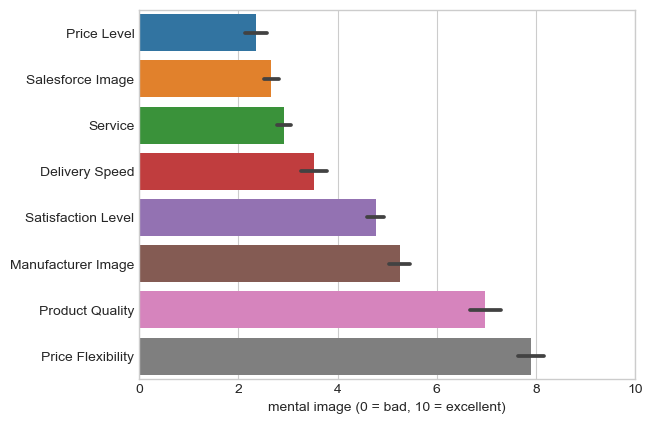

In [24]:
### List mental image variables in order according to the means.

list2 = hatco1.mean().sort_values().index

### Draw a figure of means and associated margins of error.

sns.barplot(data=hatco1[list2], orient='h')

### Polishing the horizontal axis

plt.xlabel('mental image (0 = bad, 10 = excellent)')
plt.xlim(0, 10)

(0.0, 10.0)

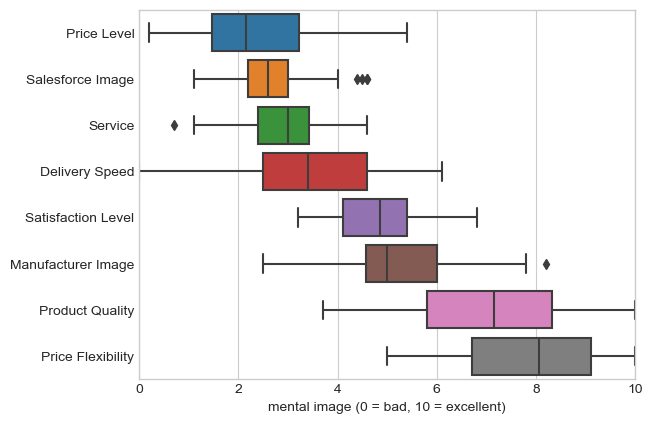

In [25]:
### Boxplot of image variables

sns.boxplot(data=hatco1[list2], orient='h')

### Polishing the horizontal axis

plt.xlabel('mental image (0 = bad, 10 = excellent)')
plt.xlim(0, 10)

## Colors and sizes of charts

When creating a chart, you can specify a color as the value of the __color__ parameter (this also works for seaborn charts). For example, in the first chart of this notebook, the bars are colored green as follows: $$\textrm{df1['f'].plot.bar(width=0.8, rot=0, color='green')}.$$ The edge color can be determined using the __edgecolor__ parameter.

List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

When creating the chart, you can define the color map to be used directly for charts made from the dataframe with the __cmap__ parameter and for seaborn charts with the __palette__ parameter. For example, in the last chart of this notebook, the color chart can be changed to Greens: $$\textrm{sns.boxplot(data=hatco1[list2], orient='h', palette='Greens')}$$

Choosing Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

The size of the chart made directly from the dataframe can be specified as the value of the __figsize__ parameter. For example, 
$$\textrm{df1['f'].plot.bar(width=0.8, rot=0, figsize=(10, 6))}.$$

The size of a Seaborn chart can be determined by creating a figure surrounding the chart before creating the chart. For example,
$$\textrm{plt.figure(figsize=(10,6))}.$$

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [26]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-04-06 20:14 by Juha Nurmonen
